In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
import pickle

In [4]:
from sklearn import metrics

In [5]:
df = pd.read_csv("Stats.csv",index_col = 0)

In [6]:
df

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
0,70.8,20.10%,3509,704,40,236
1,55.8,15.80%,4771,753,54,308
2,47.6,16.70%,3526,589,59,411
3,47.5,15.20%,3184,484,42,282
4,24.7,10.30%,3481,359,66,285
...,...,...,...,...,...,...
710,40.3,11.10%,2749,306,28,591
711,39.8,13.90%,2768,385,50,549
712,30.1,8.40%,2608,219,34,442
713,25.7,8.30%,2275,189,36,583


In [7]:
#change string with % to float
def proc(acc):
    acc = acc[:-1]
    return acc

In [8]:
df["Accuracy"] = df["Accuracy"].apply(proc).apply(float)

In [9]:
df.head(2)

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
0,70.8,20.1,3509,704,40,236
1,55.8,15.8,4771,753,54,308


# Delete Outliers

In [10]:
df = df[df["Rating"] <100]

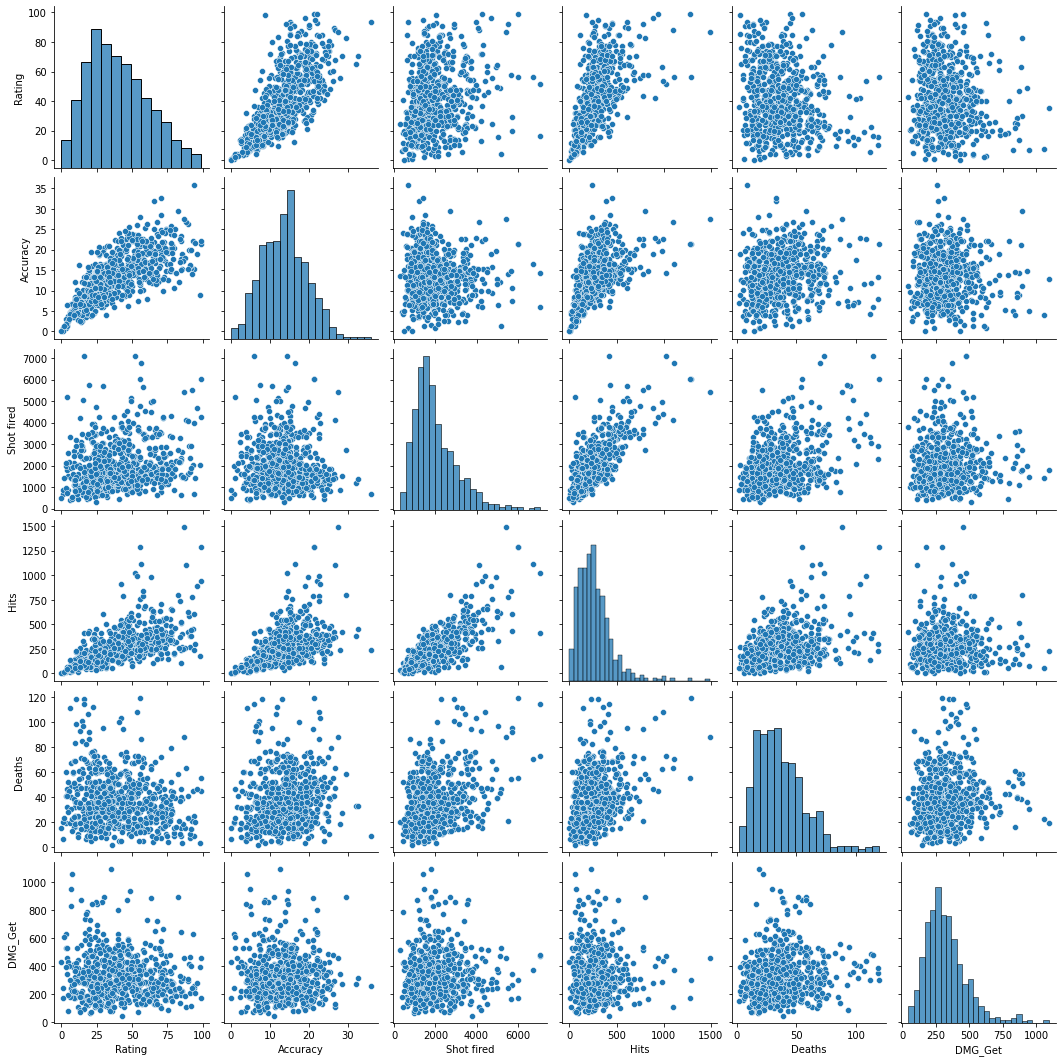

In [11]:
sns.pairplot(df)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop("Rating", axis = 1)
y = df["Rating"]

In [14]:
X

,Accuracy,Shot fired,Hits,Deaths,DMG_Get
0,20.1,3509,704,40,236
1,15.8,4771,753,54,308
2,16.7,3526,589,59,411
3,15.2,3184,484,42,282
4,10.3,3481,359,66,285
...,...,...,...,...,...
710,11.1,2749,306,28,591
711,13.9,2768,385,50,549
712,8.4,2608,219,34,442
713,8.3,2275,189,36,583


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [16]:
from sklearn.linear_model import LinearRegression

# Linear Regression

In [17]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
predictions = lm.predict(X_test)

In [22]:
lm.coef_

array([ 2.62480278e+00,  6.36459811e-03,  2.30054740e-02, -5.18296886e-01,
       -5.16812415e-04])

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.035449273023936
MSE: 96.93007556421867
RMSE: 9.84530728642934


In [24]:
np.mean(df["Rating"])

40.63996983408745

In [25]:
with open ("linear_regression.pkl", "wb") as file:
    pickle.dump(lm,file)

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [19]:
grid_params = {"n_estimators": [1000,2000,4000],
              "max_depth": [4,5,6,7,8,9,10],
               "min_impurity_decrease": [0.01,0.02,0.05],
               "max_features":[2,3,4]
              }

In [20]:
grid_forest = GridSearchCV(RandomForestRegressor, param_grid = grid_params)

In [21]:
#Long Time !!!

In [22]:
#grid_forest.fit(X_train,y_train)

In [28]:
#grid_forest.best_params_

In [29]:
#preds = grid_forest.predict(X_test)

In [30]:
#print('MAE:', metrics.mean_absolute_error(y_test, preds))
#print('MSE:', metrics.mean_squared_error(y_test, preds))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [31]:
#Best model

In [28]:
forest = RandomForestRegressor(n_estimators= 1000, max_depth=10,criterion="mse", max_features=3)

In [29]:
forest.fit(X_train, y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', max_depth=10, max_features=3,
                      n_estimators=1000)

In [30]:
preds = forest.predict(X_test)

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 6.800004550420648
MSE: 81.04289679605547
RMSE: 9.002382839896084


In [32]:
with open ("forest.pkl", "wb") as file:
    pickle.dump(forest,file)

# AdaBoost

In [44]:
#U need log time to grid search this

In [61]:
param_grid_ada = {"base_estimator": [forest],
              "n_estimators": [3,5,10,20],
             "learning_rate": [0.05,0.1,0.2],
             "loss": ['linear', 'square']}

In [62]:
grid_ada = GridSearchCV(ada,param_grid_ada)

In [ ]:
#grid_ada.fit(X_train,y_train)

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

In [ ]:
grid_ada.best_params_

In [49]:
#Probably the best parms bellow

In [52]:
ada = AdaBoostRegressor(base_estimator = forest,
 learning_rate= 0.1,
 loss =  'linear',
 n_estimators =  200)

In [53]:
ada.fit(X_train,y_train)

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

AdaBoostRegressor(base_estimator=RandomForestRegressor(criterion='mse',
                                                       max_depth=10,
                                                       max_features=3,
                                                       n_estimators=4000),
                  learning_rate=0.1, n_estimators=200)

In [57]:
ada = AdaBoostRegressor(base_estimator = forest,
 learning_rate= 0.1,
 loss =  'linear',
 n_estimators =  10)

In [58]:
ada.fit(X_train,y_train)

C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\kacpe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

AdaBoostRegressor(base_estimator=RandomForestRegressor(criterion='mse',
                                                       max_depth=10,
                                                       max_features=3,
                                                       n_estimators=4000),
                  learning_rate=0.1, n_estimators=10)

In [59]:
pred = ada.predict(X_test)

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 6.72007709261037
MSE: 79.69886937098228
RMSE: 8.927422325116153


# Gradient Boost

In [135]:
from sklearn.ensemble import GradientBoostingRegressor

In [136]:
gradient = GradientBoostingRegressor()

In [137]:
param_grid_gradient = {"n_estimators": [100,150,200,250,300],
             "learning_rate": [0.01,0.02,0.05,0.1],
             "max_depth": [2,3,4],
                "criterion" : ["squared_error"]   }

In [138]:
grid_gradient = GridSearchCV(gradient,param_grid=param_grid_gradient)

In [139]:
grid_gradient.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'learning_rate': [0.01, 0.02, 0.05, 0.1],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [140]:
grid_gradient.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 150}

In [141]:
grid_gradient.best_estimator_.feature_importances_

array([0.42812615, 0.0146325 , 0.31324281, 0.2370769 , 0.00692163])

In [142]:
pred_grid_gradient = grid_gradient.predict(X_test)

In [143]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_grid_gradient))
print('MSE:', metrics.mean_squared_error(y_test, pred_grid_gradient))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_grid_gradient)))

MAE: 6.567110728077022
MSE: 75.18021153206865
RMSE: 8.6706523129502


In [55]:
len(pred_grid_gradient)

143

In [144]:
with open ("gradient.pkl", "wb") as file:
    pickle.dump(grid_gradient,file)

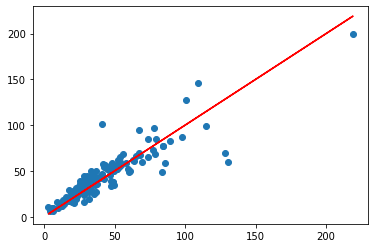

In [57]:
plt.scatter(y_test,pred_grid_gradient)

# Perfect predictions
plt.plot(y_test,y_test,'r')

# KNN

In [44]:
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

In [53]:
KNN = KNeighborsRegressor()

In [60]:
param_grid = {
    "n_neighbors": [2,3,4,5,6,7,8,9,10],
    "weights": ["uniform","distance"],
    "leaf_size": [10,20,30,40,50],
    "p": [1,2],
    "metric" :["cityblock","euclidean","l1","l2","manhattan"]
       
}

In [61]:
Grid_KNN = GridSearchCV(KNN, param_grid=param_grid)

In [62]:
Grid_KNN.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['cityblock', 'euclidean', 'l1', 'l2',
                                    'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [63]:
Grid_KNN.best_params_

{'leaf_size': 10,
 'metric': 'cityblock',
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

In [64]:
preds = Grid_KNN.predict(X_test)

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 10.996378977836683
MSE: 201.0844475050292
RMSE: 14.180424799879205


In [58]:
#With Outliers

In [59]:
df2 = df[df["Rating"] < 100]

In [60]:
len(df2)

663

In [61]:
X = df2.drop("Rating", axis = 1)

In [62]:
y = df2["Rating"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)
X_test.to_csv("X_test.csv", encoding="utf-8")
y_test.to_csv("y_test.csv", encoding="utf-8")

In [91]:
gradient_without_outliers = GradientBoostingRegressor(loss="absolute_error")

In [99]:
param_grid_gradient = {"n_estimators": [100,150,200,250,300],
             "learning_rate": [0.01,0.02,0.05,0.1],
             "max_depth": [2,3,4]}

In [100]:
grid_gradient_without_outliers = GridSearchCV(gradient_without_outliers,param_grid=param_grid_gradient_without_outliers)

In [101]:
grid_gradient_without_outliers.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(loss='absolute_error'),
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 150, 200, 300]})

In [102]:
grid_gradient_without_outliers.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

In [103]:
pred_without_outliers = grid_gradient_without_outliers.predict(X_test)

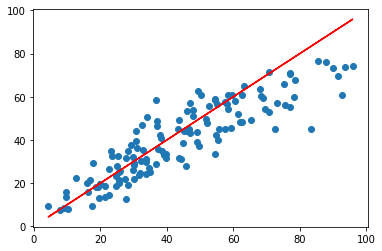

In [104]:
plt.scatter(y_test,pred_without_outliers)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_without_outliers))
print('MSE:', metrics.mean_squared_error(y_test, pred_without_outliers))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_without_outliers)))

MAE: 8.10680626626951
MSE: 111.55538513810465
RMSE: 10.561978277676236


In [85]:
grid_gradient_without_outliers.best_score_

0.772006572625738

In [86]:
len(y_test)

133

In [89]:
with open ("saved_steps_under_100.pkl", "wb") as file:
    pickle.dump(grid_gradient_without_outliers,file)